In [90]:
import numpy as np 
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split
seed=15100873 # n number same convention as capstone for repeatablilty


In [3]:
df=pd.read_csv(r'C:\Users\buzga\Desktop\School\grad school\ids\data anlysis 2\movieReplicationSet.csv')

## missing data imputation

In [4]:
df = df.drop(896).reset_index(drop=True) # dropped the row with now reveiws
row_means = np.nanmean(df, axis=1) ## took the means prior to starting to prevent a mooving average
col_means = np.nanmean(df, axis=0)
imputed_values = np.add.outer(row_means, col_means) / 2 #
for j, col in enumerate(df.columns):
  for i, rating in enumerate(df[col]):
    if np.isnan(rating):
      df[col][i] = imputed_values[i, j]

## drop the row that has no reviews. 

C:\Users\buzga\AppData\Local\Temp/ipykernel_2704/983582987.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = imputed_values[i, j]


- Question1 

In [5]:
def question_1_prep_data(i,j):    
    ## i is index of current film j IS THE OTHER FILM TITLE
    x=df[df.columns[i]]
    y=df[j]
    return x,y
def question_1_regress(x,y):
    model=LinearRegression()
    model.fit(x.values.reshape(-1,1),y)
    return model.score(x.values.reshape(-1,1), y)
def single_movie_run(i):
    # i is index of current film 
    current_film=df.columns[:400][i]
    other_films=[movie for movie in df.columns[:400] if current_film!=movie]
    one_film_cod=[]
    for j in other_films:
        x,y=question_1_prep_data(i,j)
        one_film_cod.append(question_1_regress(x,y))
    best_predicted_by=other_films[np.argmax(one_film_cod)] ## try to run this again with the score method 
    best_coef=max(one_film_cod) 
    average_cod=np.mean(one_film_cod)
    return best_predicted_by,best_coef,average_cod
def all_movies_run():
    best_predicted_by=[]
    best_coef=[]
    average_cod=[]
    for i in range(400):
        single_run=single_movie_run(i)
        best_predicted_by.append(single_run[0])
        best_coef.append(single_run[1])
        average_cod.append(single_run[2])
    return best_predicted_by,best_coef,average_cod
best_predicted_by,best_coef,average_cod=all_movies_run()

The average of the best COD was,0.36008324148646936
0.3609802794008495


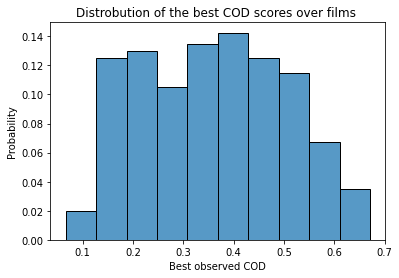

In [69]:
ax=sns.histplot(data=best_coef, stat="probability")
ax.set(xlabel="Best observed COD", title="Distrobution of the best COD scores over films ")
print("The average of the best COD was,{0}".format(np.mean(best_coef)))

print(np.median(best_coef))

In [34]:
least_well_predicted=np.argsort(best_coef)[:10]
most_well_predicted=np.argsort(best_coef)[-10:]
temp=np.array(best_coef)
best_predicted_by=np.array(best_predicted_by)
cod=np.concatenate((temp[least_well_predicted], temp[most_well_predicted]))
best_predicted_movies=np.concatenate((df.columns[least_well_predicted], df.columns[most_well_predicted]))
movies_best_predicted_by=np.concatenate((best_predicted_by[least_well_predicted],best_predicted_by[most_well_predicted]))
x={'Film': best_predicted_movies, "Best predicted by": movies_best_predicted_by, "COD":cod  }
pd.DataFrame(x)


,Film,Best predicted by,COD
0,Avatar (2009),Pirates of the Caribbean: Dead Man's Chest (2006),0.066276
1,Interstellar (2014),Torque (2004),0.075541
2,Black Swan (2010),Once Upon a Time in America (1984),0.089735
3,La La Land (2016),The Lookout (2007),0.105383
4,Clueless (1995),Sixteen Candles (1984),0.106965
5,The Cabin in the Woods (2012),The Evil Dead (1981),0.111338
6,Grown Ups 2 (2013),Knight and Day (2010),0.119428
7,Back to the Future (1985),3000 Miles to Graceland (2001),0.123774
8,The Wolf of Wall Street (2013),Memento (2000),0.127652
9,Planet of the Apes (2001),Equilibrium (2002),0.130206


Qeustion 2 

In [8]:
df.columns
gender='Gender identity (1 = female; 2 = male; 3 = self-described)'
only_child= 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'
social='Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'
current_film=best_predicted_movies[-1]
current_film_best_predicted_by=movies_best_predicted_by[-1]
print(current_film, current_film_best_predicted_by)
X=df[[gender, only_child, social, current_film_best_predicted_by]]
y=df[current_film]
linear_model=LinearRegression().fit(X,y)

print("old r^2 is {0}, new r^2 is {1}".format(cod[-1],max(np.abs(linear_model.coef_))))

I.Q. (1994) Erik the Viking (1989)
old r^2 is 0.6709919718097511, new r^2 is 0.8494596095270107


In [9]:


print("old r^2 is {0}, new r^2 is {1}".format(cod[-1],max(np.abs(linear_model.coef_))))
gender='Gender identity (1 = female; 2 = male; 3 = self-described)'
only_child= 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'
social='Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'
cod_adjusted=[]
for i in range(len(best_predicted_movies)):    
    current_film=best_predicted_movies[i]
    current_film_best_predicted_by=movies_best_predicted_by[i]
    X=df[[gender, only_child, social, current_film_best_predicted_by]]
    print(current_film, current_film_best_predicted_by)
    y=df[current_film]
    lm=LinearRegression().fit(X,y)
    score=lm.score(X,y)
    cod_adjusted.append(score)
    print("old r^2 is {0}, new r^2 is {1}".format(cod[i],score))
cod_adjusted=np.array(cod_adjusted)

Avatar (2009) Pirates of the Caribbean: Dead Man's Chest (2006)
old r^2 is 0.06627575361593108, new r^2 is 0.07098196530530876
Interstellar (2014) Torque (2004)
old r^2 is 0.07554127037955771, new r^2 is 0.08142207215051389
Black Swan (2010) Once Upon a Time in America (1984)
old r^2 is 0.08973534038655884, new r^2 is 0.09137003176382741
La La Land (2016) The Lookout (2007)
old r^2 is 0.10538276277553682, new r^2 is 0.10851705163510406
Clueless (1995) Sixteen Candles (1984)
old r^2 is 0.10696500417740928, new r^2 is 0.11131483758488747
The Cabin in the Woods (2012) The Evil Dead (1981)
old r^2 is 0.11133811142687478, new r^2 is 0.11926702706270087
Grown Ups 2 (2013) Knight and Day (2010)
old r^2 is 0.1194277226873407, new r^2 is 0.125387528400699
Back to the Future (1985) 3000 Miles to Graceland (2001)
old r^2 is 0.12377397541915225, new r^2 is 0.12683566709604277
The Wolf of Wall Street (2013) Memento (2000)
old r^2 is 0.12765237296771081, new r^2 is 0.14013866018573107
Planet of the 

In [47]:
len(cod)==len(cod_adjusted)
cod[0]
np.mean(((cod_adjusted-cod)/cod)*100)
np.mean(((cod_adjusted-cod)/cod)*100)

2.57650871027891

0.6715825618847209

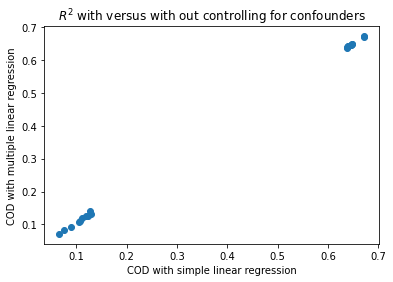

In [56]:


plt.scatter(x=cod, y=cod_adjusted)
plt.xlabel("COD with simple linear regression")
plt.ylabel("COD with multiple linear regression")
plt.title("$R^2$ with versus with out controlling for confounders")


## mabeey break these up into two more graphs.

np.mean(((cod_adjusted[:10]-cod[:10])/cod[:10])*100)
np.mean(((cod_adjusted[10:20]-cod[10:20])/cod[10:20])*100)


cod_adjusted[-1]

- the change is pretty noteable, the simple lienar regresions $R^2$ are much larger  there is a kind of bimodal distrobution based on if blocking for these reduced for increased $r^2$

question 3 

- picking 30 moives 

In [11]:
min_index=len(average_cod)//2-15
max_index=len(average_cod)//2+15
thirty_movies_index=np.argsort(best_coef)[min_index:max_index]
thirty_movie_titles=df.columns[thirty_movies_index]
thirty_movie_titles

Index(['Blues Brothers 2000 (1998)', '28 Days Later (2002)',
       'The Machinist (2004)', 'Equilibrium (2002)', 'Goodfellas (1990)',
       'Uptown Girls (2003)', 'Knight and Day (2010)', 'Just Married (2003)',
       'The Poseidon Adventure (1972)', 'The Godfather: Part II (1974)',
       'The Godfather (1972)', 'The Evil Dead (1981)', 'The Rock (1996)',
       'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
       'Pirates of the Caribbean: At World's End (2007)', 'Hellraiser (1987)',
       'Predator (1987)', 'My Best Friend's Wedding (1997)',
       'Monsters  Inc.(2001)', 'The Good the Bad and the Ugly (1966)',
       'The Green Mile (1999)', 'Let the Right One In (2008)',
       'There's Something About Mary (1998)',
       'Austin Powers: The Spy Who Shagged Me (1999)',
       'Austin Powers in Goldmember (2002)', 'Showgirls (1995)',
       'Black Hawk Down (2001)', 'The Talented Mr. Ripley (1999)',
       'Star Wars: Episode II - Attack of the Clones (2002)',

- function to tune hyper paramters in terms of coeficent of determination. 

In [12]:
def alpha_plot(validation_score, train_score, alpha_range, chosen_alpha,scoring, model_name, test_score, movie_name):
    
    plt.figure(figsize = (8,8))
    sns.lineplot(y = validation_score, x = alpha_range, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = alpha_range, 
                 label = 'training_data')
    plt.axvline(x=chosen_alpha, linestyle='--')
    sns.lineplot(y = test_score, x = alpha_range,label = 'test_data')
    plt.xlabel('alpha_parameter')
    plt.ylabel(scoring)
    plt.title(model_name + ' Regularisation For '+ movie_name)
    plt.legend()
    plt.show()

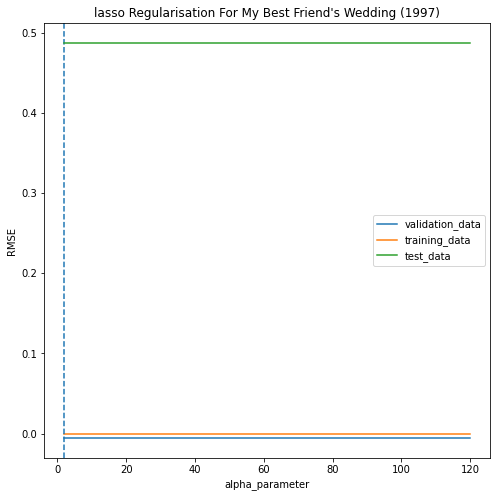

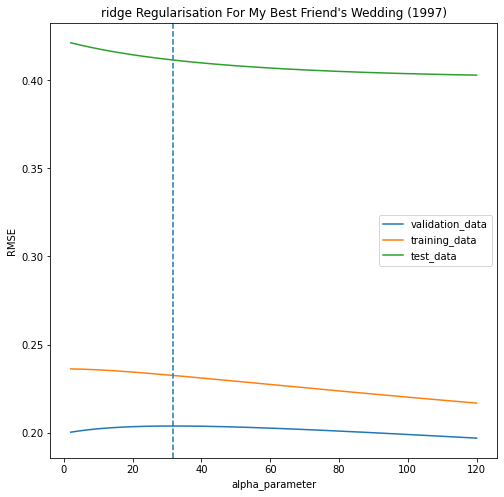

(0.6415328698177482,
 0.15436167398732747,
 31.64824120603015,
 array([ 0.14521639,  0.14022742,  0.18011073,  0.08693805, -0.09724753,
         0.05624735,  0.31276425,  0.05543687,  0.01018144,  0.1275146 ]))

In [111]:
import sklearn.linear_model as linear_model
from sklearn.model_selection import cross_validate
def tune_parameters(alpha_range, X_train, y_train,X_test, y_test, model_name, movie_name, show_chart=False):
    validation_scores = []
    train_scores = []
    test_scores = []
    COD=[]
    coefs=[]
    for alpha in alpha_range:
        if(model_name=="lasso"):
            model= linear_model.Lasso(alpha = alpha)
        else:
            model=linear_model.Ridge(alpha=alpha)
        cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='r2',return_train_score = True)
        validation_scores.append(np.mean(cv_results['test_score']))
        train_scores.append(np.mean(cv_results['train_score']))
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        test_scores.append(mean_squared_error(y_test,y_pred))
        COD.append(model.score(X_test,y_test))
        coefs.append(model.coef_)
    best_alpha_index = np.argmax(validation_scores)
    best_alpha = alpha_range[best_alpha_index]
    best_coefs=coefs[best_alpha_index]
    RMse_for_best_alpha = np.sqrt(test_scores[best_alpha_index])
    COD_for_best_alpha = COD[best_alpha_index]
    if(show_chart):
        alpha_plot(validation_scores, train_scores, alpha_range, best_alpha,"RMSE", model_name, test_scores, movie_name)
    return RMse_for_best_alpha,COD_for_best_alpha,best_alpha,best_coefs 
alpha_range= np.linspace(2, 120, 200)
potential_other_movies=[x for x in df.columns[:400] if x!=current_film]
chosen_other_movies=np.random.choice(potential_other_movies, size=10, replace=False)
X=df[chosen_other_movies]
y=df[current_film]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
model_name='lasso'
tune_parameters(alpha_range, X_train, y_train,X_test, y_test, model_name, "My Best Friend's Wedding (1997)", True)
tune_parameters(alpha_range, X_train, y_train,X_test, y_test, 'ridge', "My Best Friend's Wedding (1997)", True)

In [76]:
np.random.seed(seed)
rmse=[]
parmas=[]
cod=[]
coefs=[]
for current_film in thirty_movie_titles:
    potential_other_movies=[x for x in df.columns[:400] if x!=current_film]
    chosen_other_movies=np.random.choice(potential_other_movies, size=10, replace=False)
    X=df[chosen_other_movies]
    y=df[current_film]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
    alpha_range=np.concatenate((np.linspace(.0001, 2, 200), np.linspace(2, 120, 200)))
    temp=tune_parameters(alpha_range, X_train, y_train,X_test, y_test, "ridge",current_film)
    rmse.append(temp[0])
    parmas.append(temp[2]) 
    cod.append(temp[1])
    coefs.append(temp[3])
rmse_1=rmse
parmas_1=parmas
cod_1=cod
coefs_1=coefs

[max(i) for i in coefs_1 ]


In [115]:
np.mean(parmas_1)

np.median(cod_1)

0.270146067715595

In [108]:
X={"Movie": thirty_movie_titles, "RMSE":rmse_1, "best found hyper-parameters": parmas_1, "best COD": cod_1, "Mean Coef":mean_ceof }
temp=pd.DataFrame(X)
temp.sort_values(by="RMSE")

,Movie,RMSE,best found hyper-parameters,best COD,Max Coef
17,My Best Friend's Wedding (1997),0.271220,4.964824,0.555598,0.096468
27,The Talented Mr. Ripley (1999),0.271823,71.376884,0.506663,0.083491
21,Let the Right One In (2008),0.287941,73.748744,0.285655,0.071317
7,Just Married (2003),0.288187,21.567839,0.493671,0.097023
20,The Green Mile (1999),0.295996,41.728643,0.313920,0.076695
25,Showgirls (1995),0.319398,12.673367,0.250519,0.089650
2,The Machinist (2004),0.329149,45.286432,0.251137,0.084812
15,Hellraiser (1987),0.332730,67.226131,0.391814,0.066001
16,Predator (1987),0.343327,72.562814,0.259987,0.073189
5,Uptown Girls (2003),0.344718,31.055276,0.509593,0.093643


In [78]:
np.random.seed(seed)
rmse=[]
parmas=[]
cod=[]
coefs=[]
for current_film in thirty_movie_titles:
    potential_other_movies=[x for x in df.columns[:400] if x!=current_film]
    chosen_other_movies=np.random.choice(potential_other_movies, size=10, replace=False)
    X=df[chosen_other_movies]
    y=df[current_film]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
    alpha_range=np.concatenate((np.linspace(.0001, 2, 200), np.linspace(2, 120, 200)))
    temp=tune_parameters(alpha_range, X_train, y_train,X_test, y_test, 'lasso',current_film)
    rmse.append(temp[0])
    parmas.append(temp[2]) 
    cod.append(temp[1])
    coefs.append(temp[3])

In [121]:
np.median(cod)


0.24241584173418207

In [112]:

mean_ceof_1=[np.mean(i) for i in coefs ]
X={"Movie": thirty_movie_titles, "RMSE":rmse, "best found hyper-parameters": parmas, "best COD": cod, "Mean Coefcients":mean_ceof_1 }
temp=pd.DataFrame(X)
temp.sort_values(by="RMSE")

,Movie,RMSE,best found hyper-parameters,best COD,Mean Coefcients
17,My Best Friend's Wedding (1997),0.286845,0.000100,0.502918,0.082297
27,The Talented Mr. Ripley (1999),0.291290,0.000100,0.433469,0.084305
7,Just Married (2003),0.302664,0.010150,0.441524,0.081714
20,The Green Mile (1999),0.305606,0.010150,0.268646,0.080055
15,Hellraiser (1987),0.309487,0.010150,0.473815,0.062433
25,Showgirls (1995),0.344613,0.010150,0.127512,0.068551
21,Let the Right One In (2008),0.345911,0.010150,-0.030933,0.070749
4,Goodfellas (1990),0.348740,0.000100,0.278430,0.092205
16,Predator (1987),0.355133,0.010150,0.208215,0.082472
2,The Machinist (2004),0.358827,0.000100,0.110010,0.098180


In [75]:



np.mean(parmas_1)


[38.17085427135679, 77.30653266331659, 45.28643216080402]

- question 5?

In [25]:
orginal_df=pd.read_csv(r'C:\Users\buzga\Desktop\School\grad school\ids\data anlysis 2\movieReplicationSet.csv')
orginal_df = orginal_df.drop(896).reset_index(drop=True) 

In [26]:
## data cleaning

user_means=np.mean(orginal_df, axis=1)
movies_data_frame=orginal_df[orginal_df.columns[0:400]]
movies_data_frame=movies_data_frame.reindex(movies_data_frame.mean().sort_values().index, axis=1)
mid_movies= movies_data_frame.columns[len(movies_data_frame.columns)//2-2: len(movies_data_frame.columns)//2+2]
median_split_movies=pd.DataFrame({y:(df[y]<=np.median(df[y])).astype(int) for y in mid_movies})

In [155]:
def train_test_split_question_5(i):
    X=user_means
    y=median_split_movies[median_split_movies.columns[i]]
    print(X.shape, y.shape)
    return train_test_split(X, y, test_size=.2, random_state=seed) 
    
def fit_logistic_model(X_train, X_test, y_train, y_test):
    y= linear_model.LogisticRegression(random_state=seed)
    y.fit(X_train.values.reshape(-1,1),y_train)
    cv_results = cross_validate(y, X_train.values.reshape(-1,1), y_train, cv=5, scoring='roc_auc')
    return y.predict_proba(X_test.values.reshape(-1,1))[:,1], [y.coef_[0][0], y.intercept_[0]], np.mean(cv_results['test_score'])
def evaluate_model(probs, y_test,i, beta, valdiation_roc):
    validation_scores = []
    fpr, tpr =roc_curve(y_test, probs)[:2]
    random_classifier=np.linspace(0.0, 1.0, 100)
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, color="purple")
    plt.plot(random_classifier, random_classifier, 'r--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve for {0}".format(median_split_movies.columns[i]))
    plt.show()
    print("Model Coefcient Beta is {0} and intercept is {1}".format(beta[0], beta[1]))
    print("Average ROC during validation is",valdiation_roc )
    print("Area under ROC Curve (AUROC): ", auc(fpr, tpr))
    return beta[0],beta[1], valdiation_roc,  auc(fpr, tpr)

def question_5_movie_run(i):
    X_train, X_test, y_train, y_test = train_test_split_question_5(1)
    probs,beta,valdiation_roc=fit_logistic_model(X_train, X_test, y_train, y_test )
    evaluate_model(probs,y_test, beta,valdiation_roc)  
def question_5_run(user_means,median_split_movies):
    beta_0,beta_1, validation, cod=[],[],[],[]
    for i in range(len(median_split_movies.columns)):
        X_train, X_test, y_train, y_test = train_test_split_question_5(i)
        probs, beta,valdiation_roc=fit_logistic_model(X_train, X_test, y_train, y_test )
        run =evaluate_model(probs,y_test,i, beta,valdiation_roc)
        beta_0.append(run[0])
        beta_1.append(run[1])
        validation.append(run[2])
        cod.append(run[3])
    return beta_0,beta_1, validation, cod

(1096,) (1096,)


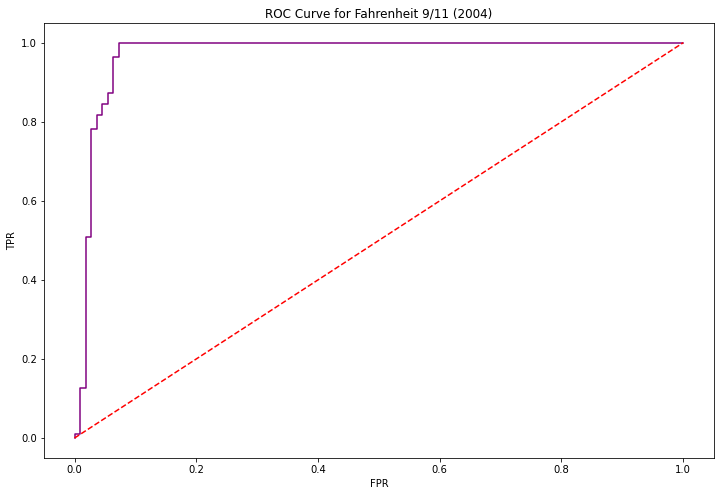

Model Coefcient Beta is -8.418772319939318 and intercept is 25.747610483033785
Average ROC during validation is 0.958098223615465
Area under ROC Curve (AUROC):  0.9720661157024794
(1096,) (1096,)


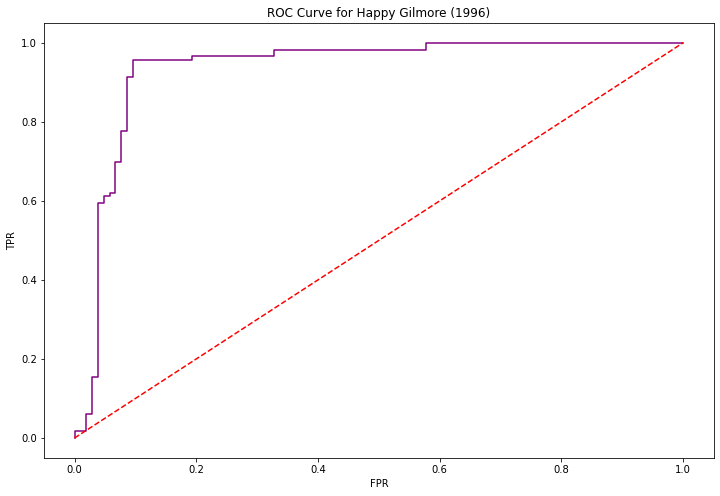

Model Coefcient Beta is -6.267712958263625 and intercept is 19.09836460164296
Average ROC during validation is 0.9074885138018681
Area under ROC Curve (AUROC):  0.9336870026525199
(1096,) (1096,)


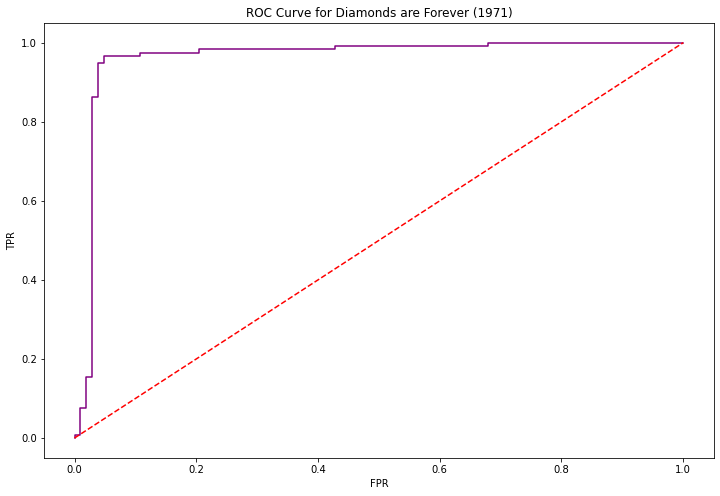

Model Coefcient Beta is -8.467903578573242 and intercept is 25.848218062452286
Average ROC during validation is 0.9621522501808221
Area under ROC Curve (AUROC):  0.9609161065471745
(1096,) (1096,)


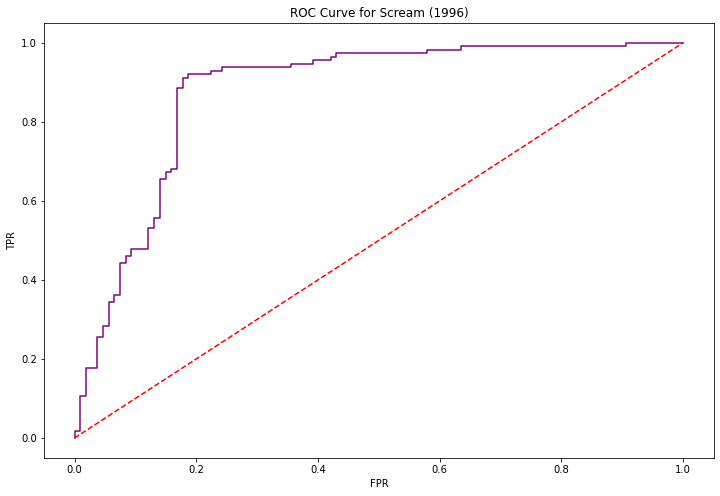

Model Coefcient Beta is -5.72544268148874 and intercept is 17.45576107257229
Average ROC during validation is 0.8897325149988846
Area under ROC Curve (AUROC):  0.874617484079067


Index(['Fahrenheit 9/11 (2004)', 'Happy Gilmore (1996)',
       'Diamonds are Forever (1971)', 'Scream (1996)'],
      dtype='object')

In [156]:
beta_0,beta_1, validation, cod=question_5_run(user_means,median_split_movies)
median_split_movies.columns

In [159]:
X={"Movie": median_split_movies.columns,"Validation COD":validation ,"Test COD": cod,"Beta_0":beta_0, "Beta_1": beta_1}
temp=pd.DataFrame(X)
temp.sort_values("Test COD")


,Movie,Validation COD,Test COD,Beta_0,Beta_1
3,Scream (1996),0.889733,0.874617,-5.725443,17.455761
1,Happy Gilmore (1996),0.907489,0.933687,-6.267713,19.098365
2,Diamonds are Forever (1971),0.962152,0.960916,-8.467904,25.848218
0,Fahrenheit 9/11 (2004),0.958098,0.972066,-8.418772,25.747610


- Extra credit Question

- I decided to run a logistic regression to see if there was any one movie that was most predictive of if soomeone was an only child or not 
- for this purpose i cut out cases where there was a null response in the only child colomn 
- then took the movie that had hte hieght cross validated resposne 

In [ ]:
df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"] 

only_child_response_df=df[(df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==1) ^ (df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==0)]

In [ ]:


only_gender_response=df[(df['Gender identity (1 = female; 2 = male; 3 = self-described)']==1) ^ (df['Gender identity (1 = female; 2 = male; 3 = self-described)']==2)]
x={1.0:1.0,  2.0:0}
y=[]
for i in only_gender_response["Gender identity (1 = female; 2 = male; 3 = self-described)"]:
    y.append(x[i])
only_gender_response["Gender identity (1 = female; 2 = male; 3 = self-described)"]=np.array(y)

C:\Users\buzga\AppData\Local\Temp/ipykernel_20748/1452787709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_gender_response["Gender identity (1 = female; 2 = male; 3 = self-described)"]=np.array(y)


the most predictive film is American Pie (1999)


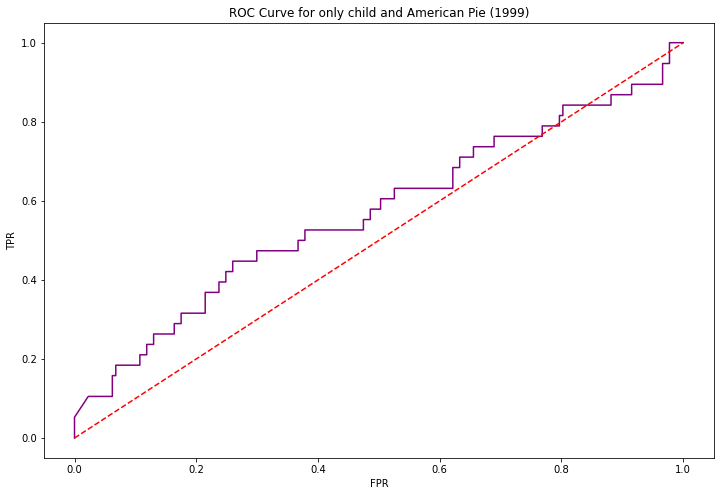

Model Coefcient Beta is [[-0.3900643]] and intercept is [-0.60451965]
Average ROC during validation is 0.5579934199212369
Area under ROC Curve (AUROC):  0.5686886708296165


In [ ]:

def extra_credit_prep_data(i):    
    X=only_child_response_df[i]
    y=only_child_response_df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']
    return train_test_split(X, y, test_size=.2, random_state=seed) 
def fit_logistic_model(X_train, X_test, y_train, y_test):
    y= linear_model.LogisticRegression(random_state=seed)
    y.fit(X_train.values.reshape(-1,1),y_train)
    cv_results = cross_validate(y, X_train.values.reshape(-1,1), y_train, cv=10, scoring='roc_auc')
    return np.mean(cv_results['test_score'])
def run_over_movies():
    cv_roc=[]
    for i in df.columns[:400]:
        X_train, X_test, y_train, y_test=extra_credit_prep_data(i)
        cv_roc.append(fit_logistic_model(X_train, X_test, y_train, y_test))
    most_pred_film_index=np.argsort(cv_roc)[-1]
    print("the most predictive film is {0}".format(df.columns[most_pred_film_index]))
    X_train, X_test, y_train, y_test=extra_credit_prep_data(i)
    log_regresion=linear_model.LogisticRegression(random_state=seed)
    probs=log_regresion.fit(X_train.values.reshape(-1,1),y_train).predict_proba(X_test.values.reshape(-1,1))[:,1]
    fpr, tpr = roc_curve(y_test, probs)[:2]
    random_classifier=np.linspace(0.0, 1.0, 100)
    cv_results = cross_validate( log_regresion,X_train.values.reshape(-1,1), y_train, cv=10, scoring='roc_auc')
    validation_roc=np.mean(cv_results['test_score'])
    beta=[log_regresion.coef_, log_regresion.intercept_]
    fpr, tpr =roc_curve(y_test, probs)[:2]
    random_classifier=np.linspace(0.0, 1.0, 100)
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, color="purple")
    plt.plot(random_classifier, random_classifier, 'r--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve for only child and {0}".format(df.columns[most_pred_film_index]))
    plt.show()
    print("Model Coefcient Beta is {0} and intercept is {1}".format(beta[0], beta[1]))
    print("Average ROC during validation is",validation_roc )
    print("Area under ROC Curve (AUROC): ", auc(fpr, tpr))
beet=run_over_movies()

the most predictive film is Batman: The Dark Knight (2008)


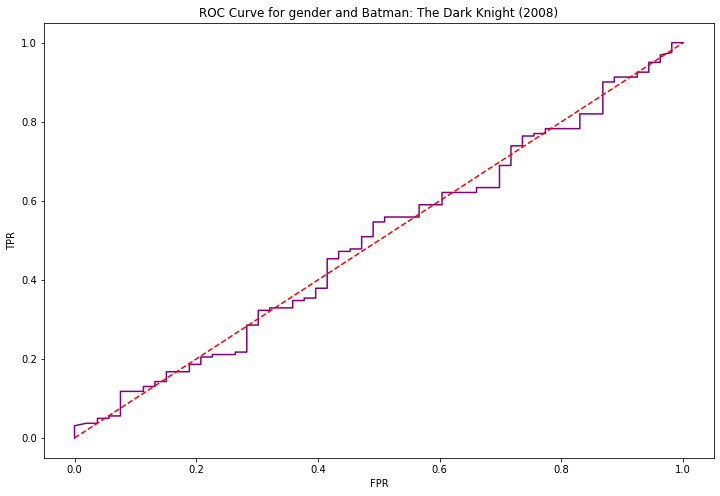

Model Coefcient Beta is [[0.37204304]] and intercept is [0.15132062]
Average ROC during validation is 0.5141237408424908
Area under ROC Curve (AUROC):  0.4975975624047814


In [ ]:

def extra_credit_prep_data(i):    
    X=only_gender_response[i]
    y=only_gender_response['Gender identity (1 = female; 2 = male; 3 = self-described)']
    return train_test_split(X, y, test_size=.2, random_state=seed) 
def fit_logistic_model(X_train, X_test, y_train, y_test):
    y= linear_model.LogisticRegression(random_state=seed)
    y.fit(X_train.values.reshape(-1,1),y_train)
    cv_results = cross_validate(y, X_train.values.reshape(-1,1), y_train, cv=10, scoring='roc_auc')
    return np.mean(cv_results['test_score'])
def run_over_movies():
    cv_roc=[]
    for i in df.columns[:400]:
        X_train, X_test, y_train, y_test=extra_credit_prep_data(i)
        cv_roc.append(fit_logistic_model(X_train, X_test, y_train, y_test))
    most_pred_film_index=np.argsort(cv_roc)[-1]
    print("the most predictive film is {0}".format(df.columns[most_pred_film_index]))
    X_train, X_test, y_train, y_test=extra_credit_prep_data(i)
    log_regresion=linear_model.LogisticRegression(random_state=seed)
    probs=log_regresion.fit(X_train.values.reshape(-1,1),y_train).predict_proba(X_test.values.reshape(-1,1))[:,1]
    fpr, tpr = roc_curve(y_test, probs)[:2]
    random_classifier=np.linspace(0.0, 1.0, 100)
    cv_results = cross_validate( log_regresion,X_train.values.reshape(-1,1), y_train, cv=10, scoring='roc_auc')
    validation_roc=np.mean(cv_results['test_score'])
    beta=[log_regresion.coef_, log_regresion.intercept_]
    fpr, tpr =roc_curve(y_test, probs)[:2]
    random_classifier=np.linspace(0.0, 1.0, 100)
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, color="purple")
    plt.plot(random_classifier, random_classifier, 'r--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve for gender and {0}".format(df.columns[most_pred_film_index]))
    plt.show()
    print("Model Coefcient Beta is {0} and intercept is {1}".format(beta[0], beta[1]))
    print("Average ROC during validation is",validation_roc )
    print("Area under ROC Curve (AUROC): ", auc(fpr, tpr))
beet=run_over_movies()

In [87]:
import sklearn.ensemble 

In [101]:
def training_testing_split(i):
    gender='Gender identity (1 = female; 2 = male; 3 = self-described)'
    only_child= 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'
    social='Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'
    current_film=best_predicted_movies[i]
    current_film_best_predicted_by=movies_best_predicted_by[i]
    X=df[[gender, only_child, social, current_film_best_predicted_by]]
    y=df[current_film]
    return train_test_split(X, y, random_state=0)
def run_model(X_train, X_test, y_train, y_test):
    model=sklearn.ensemble .GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
    return cross_validate_model(model, X_train, y_train), model.score(X_test, y_test)
def cross_validate_model(model, X_train, y_train):
        cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='r2')
        return np.mean(cv_results['test_score'])
def run_all(best_predicted_movies):
    validation_cod=[]
    test_cod=[]
    for i in range(len(best_predicted_movies)):
        X_train, X_test, y_train, y_test=training_testing_split(i)
        run=run_model(X_train, X_test, y_train, y_test)
        validation_cod.append(run[0])
        test_cod.append(run[1])
    return validation_cod,test_cod
X_train, X_test, y_train, y_test= training_testing_split(1)
len(best_predicted_movies)
validation_cod,test_cod=run_all(best_predicted_movies)

In [102]:
x={"Movie": best_predicted_movies, "best predicted by":movies_best_predicted_by,'Validation COD':validation_cod, "Test COD":test_cod, 'Question 2 cod': cod_adjusted }
temp=pd.DataFrame(x)
temp.sort_values(by="Test COD")



,Movie,best predicted by,Validation COD,Test COD,Question 2 cod
2,Black Swan (2010),Once Upon a Time in America (1984),0.047709,-0.081578,0.091370
5,The Cabin in the Woods (2012),The Evil Dead (1981),0.028851,-0.079270,0.119267
1,Interstellar (2014),Torque (2004),0.003863,-0.024896,0.081422
0,Avatar (2009),Pirates of the Caribbean: Dead Man's Chest (2006),-0.000683,-0.018499,0.070982
3,La La Land (2016),The Lookout (2007),0.014397,0.049572,0.108517
4,Clueless (1995),Sixteen Candles (1984),0.017793,0.074717,0.111315
6,Grown Ups 2 (2013),Knight and Day (2010),-0.027589,0.090425,0.125388
8,The Wolf of Wall Street (2013),Memento (2000),0.087782,0.109288,0.140139
9,Planet of the Apes (2001),Equilibrium (2002),0.052746,0.159142,0.132425
7,Back to the Future (1985),3000 Miles to Graceland (2001),0.094838,0.164954,0.126836


In [ ]:

gender='Gender identity (1 = female; 2 = male; 3 = self-described)'
only_child= 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'
social='Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'

current_film=best_predicted_movies[-1]
current_film_best_predicted_by=movies_best_predicted_by[-1]
print(current_film, current_film_best_predicted_by)
X=df[[gender, only_child, social, current_film_best_predicted_by]]
y=df[current_film]
linear_model=LinearRegression().fit(X,y)

print("old r^2 is {0}, new r^2 is {1}".format(cod[-1],max(np.abs(linear_model.coef_))))
gender='Gender identity (1 = female; 2 = male; 3 = self-described)'
only_child= 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'
social='Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'
cod_adjusted=[]
for i in range(len(best_predicted_movies)):    
    current_film=best_predicted_movies[i]
    current_film_best_predicted_by=movies_best_predicted_by[i]
    X=df[[gender, only_child, social, current_film_best_predicted_by]]
    print(current_film, current_film_best_predicted_by)
    y=df[current_film]
    lm=LinearRegression().fit(X,y)
    score=lm.score(X,y)
    cod_adjusted.append(score)
    print("old r^2 is {0}, new r^2 is {1}".format(cod[i],score))
cod_adjusted=np.array(cod_adjusted)

plt.scatter(x=cod, y=cod_adjusted)
plt.xlabel("COD with simple linear regression")
plt.ylabel("COD with multiple linear regression")
plt.title("$R^2$ with versus with out controlling for confounders")


## mabeey break these up into two more graphs.

np.mean(((cod_adjusted[:10]-cod[:10])/cod[:10])*100)
np.mean(((cod_adjusted[10:20]-cod[10:20])/cod[10:20])*100)


cod_adjusted[-1]